In [5]:
# set necessary configs

airline_path = './airline.csv.shuffle'
carriers_path = './carriers.csv'

In [7]:
#create data reader to read file in chunks
import pandas as pd
#import cudf

carriers = pd.read_csv(carriers_path)

airline_data_reader = pd.read_csv(airline_path,
                    chunksize=10**6,
                    iterator=True,
                    encoding='iso8859-1')   


In [8]:
# filter data by time
import time
selected_years = [2006,2007]
start_time = time.time()
airline = pd.DataFrame()
origin_len = 0

for chunk in airline_data_reader:
    origin_len = origin_len + len(chunk.index)
    chunk = chunk.query("Year == @selected_years")
    #airline.append(chunk,ignore_index=True)
    #chunk = chunk[chunk['Year'].isin(selected_years)]
    #if(len(airline.index) == 0):
    #    airline = chunk
    #else:
    #    airline.append(chunk)
    #    airline = pd.concat([airline,chunk])
    airline = pd.concat([airline,chunk])
    #try append

print(f'Time Reduction complete. Time Elapsed {time.time() - start_time:.2f} sec.')
print(f'Origin Data Frame contained {origin_len:,} Entries')
print(f'Updated Data Frame contains {len(airline.index):,} Entries')
print(f'Data Frame was reduced by {(1-len(airline.index)/origin_len)*100:.2f} %')
display(airline.head(3))

C:\Users\Noctris\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
Time Reduction complete. Time Elapsed 97.86 sec.
Origin Data Frame contained 14,312,455 Entries
Updated Data Frame contains 14,312,455 Entries
Data Frame was reduced by 0.00 %


ActualElapsedTime  AirTime  ArrDelay  ArrTime  CRSArrTime  CRSDepTime  \
0               45.0     29.0       2.0   1120.0        1118        1030   
1              100.0     81.0      -2.0   1220.0        1222        1045   
2               33.0     22.0      -3.0   1916.0        1919        1845   

   CRSElapsedTime CancellationCode  Cancelled  CarrierDelay  ...  NASDelay  \
0            48.0              NaN          0           0.0  ...       0.0   
1            97.0              NaN          0           0.0  ...       0.0   
2            34.0              NaN          0           0.0  ...       0.0   

   Origin  SecurityDelay  TailNum TaxiIn  TaxiOut  UniqueCarrier  \
0     CVG            0.0   N785CA    3.0     13.0             OH   
1     GNV            0.0   N632AS   10.0      9.0             EV   
2     OGG            0.0   N477HA    5.0      6.0             HA   

   WeatherDelay  Year  ArrDelayClass  
0           0.0  2006              0  
1           0.0  2006              0  
2           0.0  2007              0  

[3 rows x 30 columns]

In [9]:
#delete rows without departure delay information
start_time = time.time()
origin_len = len(airline.index)
airline = airline[~pd.isna(airline['DepDelay'])]

print(f'Time Reduction complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
print(f'Origin Data Frame contained: {origin_len} Entries')
print(f'Updated Data Frame contains: {len(airline.index):,} Entries')
print(f'Data Frame was reduced by: {(1-len(airline.index)/origin_len)*100:.2f} %')
display(airline.head(3))

Time Reduction complete. Time Elapsed: 5.60 sec.
Origin Data Frame contained: 14312455 Entries
Updated Data Frame contains: 14,312,455 Entries
Data Frame was reduced by: 0.00 %


ActualElapsedTime  AirTime  ArrDelay  ArrTime  CRSArrTime  CRSDepTime  \
0               45.0     29.0       2.0   1120.0        1118        1030   
1              100.0     81.0      -2.0   1220.0        1222        1045   
2               33.0     22.0      -3.0   1916.0        1919        1845   

   CRSElapsedTime CancellationCode  Cancelled  CarrierDelay  ...  NASDelay  \
0            48.0              NaN          0           0.0  ...       0.0   
1            97.0              NaN          0           0.0  ...       0.0   
2            34.0              NaN          0           0.0  ...       0.0   

   Origin  SecurityDelay  TailNum TaxiIn  TaxiOut  UniqueCarrier  \
0     CVG            0.0   N785CA    3.0     13.0             OH   
1     GNV            0.0   N632AS   10.0      9.0             EV   
2     OGG            0.0   N477HA    5.0      6.0             HA   

   WeatherDelay  Year  ArrDelayClass  
0           0.0  2006              0  
1           0.0  2006              0  
2           0.0  2007              0  

[3 rows x 30 columns]

In [10]:
# create DepDelayClass column based on defined thresholds
import numpy as np
start_time = time.time()
delay_thresholds = [15,60]
airline['DepDelayClass'] = (np.select(
        condlist=[airline['DepDelay'] <  delay_thresholds[0], 
            airline['DepDelay'] <  delay_thresholds[1]], 
        choicelist=[0, 1], 
        default=2))
print(f'Time Reduction complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
for delay_class, value in airline['DepDelayClass'].value_counts().items():
    print(f'Delay Class {delay_class} contains {value:,} entries, thus {value / len(airline.index) *100:.2f} % of all entries')
display(airline.head(3))

Time Reduction complete. Time Elapsed: 0.15 sec.
Delay Class 0 contains 11,315,343 entries, thus 79.06 % of all entries
Delay Class 1 contains 2,092,062 entries, thus 14.62 % of all entries
Delay Class 2 contains 905,050 entries, thus 6.32 % of all entries


ActualElapsedTime  AirTime  ArrDelay  ArrTime  CRSArrTime  CRSDepTime  \
0               45.0     29.0       2.0   1120.0        1118        1030   
1              100.0     81.0      -2.0   1220.0        1222        1045   
2               33.0     22.0      -3.0   1916.0        1919        1845   

   CRSElapsedTime CancellationCode  Cancelled  CarrierDelay  ...  Origin  \
0            48.0              NaN          0           0.0  ...     CVG   
1            97.0              NaN          0           0.0  ...     GNV   
2            34.0              NaN          0           0.0  ...     OGG   

   SecurityDelay  TailNum  TaxiIn TaxiOut  UniqueCarrier  WeatherDelay  Year  \
0            0.0   N785CA     3.0    13.0             OH           0.0  2006   
1            0.0   N632AS    10.0     9.0             EV           0.0  2006   
2            0.0   N477HA     5.0     6.0             HA           0.0  2007   

   ArrDelayClass  DepDelayClass  
0              0              0  
1              0              0  
2              0              0  

[3 rows x 31 columns]

In [11]:
# create ArrDelayClass column based on defined thresholds
import numpy as np
start_time = time.time()
delay_thresholds = [15,60]
airline['ArrDelayClass'] = (np.select(
        condlist=[airline['ArrDelay'] <  delay_thresholds[0], 
            airline['ArrDelay'] <  delay_thresholds[1]], 
        choicelist=[0, 1], 
        default=2))
print(f'Time Reduction complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
for delay_class, value in airline['ArrDelayClass'].value_counts().items():
    print(f'Delay Class {delay_class} contains {value:,} entries, thus {value / len(airline.index) *100:.2f} % of all entries')
display(airline.head(3))

Time Reduction complete. Time Elapsed: 0.43 sec.
Delay Class 0 contains 10,860,233 entries, thus 75.88 % of all entries
Delay Class 1 contains 2,423,473 entries, thus 16.93 % of all entries
Delay Class 2 contains 1,028,749 entries, thus 7.19 % of all entries


ActualElapsedTime  AirTime  ArrDelay  ArrTime  CRSArrTime  CRSDepTime  \
0               45.0     29.0       2.0   1120.0        1118        1030   
1              100.0     81.0      -2.0   1220.0        1222        1045   
2               33.0     22.0      -3.0   1916.0        1919        1845   

   CRSElapsedTime CancellationCode  Cancelled  CarrierDelay  ...  Origin  \
0            48.0              NaN          0           0.0  ...     CVG   
1            97.0              NaN          0           0.0  ...     GNV   
2            34.0              NaN          0           0.0  ...     OGG   

   SecurityDelay  TailNum  TaxiIn TaxiOut  UniqueCarrier  WeatherDelay  Year  \
0            0.0   N785CA     3.0    13.0             OH           0.0  2006   
1            0.0   N632AS    10.0     9.0             EV           0.0  2006   
2            0.0   N477HA     5.0     6.0             HA           0.0  2007   

   ArrDelayClass  DepDelayClass  
0              0              0  
1              0              0  
2              0              0  

[3 rows x 31 columns]

In [17]:
# save Pre-Processed Data Frame
start_time = time.time()
airline_10k = airline[:10000]
airline.to_csv('airline.csv', 
            index = False,
            chunksize=10**6,
            encoding='iso8859-1'
)
print(f'Writing file complete. Time Elapsed: {time.time() - start_time:.2f} sec.')


Writing file complete. Time Elapsed: 171.36 sec.


In [121]:
# save Pre-Processed Data Frame
start_time = time.time()
airline_10k = airline[:10000]
airline_10k.to_csv('airline_10k.csv', 
            index = False,
            chunksize=10**6,
            encoding='iso8859-1'
)
print(f'Writing file complete. Time Elapsed: {time.time() - start_time:.2f} sec.')

Writing file complete. Time Elapsed: 0.16 sec.


In [6]:
airline_path = './airline.csv'

In [115]:
from sklearn import preprocessing
start_time = time.time()

airline_preprocessed = airline.copy()
airline_preprocessed = airline_preprocessed[:10000]

airline_target = airline_preprocessed['DepDelayClass']
airline_preprocessed = airline_preprocessed.drop(columns=['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime','CRSDepTime',
                'CRSElapsedTime', 'CancellationCode' , 'Cancelled', 'CarrierDelay', 'DepDelay', 'Diverted', 'LateAircraftDelay',
                'NASDelay', 'SecurityDelay',  'TaxiIn', 'TaxiOut', 'WeatherDelay','ArrDelayClass','DepDelayClass'])

print(f'subsetting data complete. Time Elapsed: {time.time() - start_time:.2f} sec.')
airline_preprocessed.head()

subsetting data complete. Time Elapsed: 3.72 sec.


DayOfWeek  DayofMonth  DepTime Dest  Distance  FlightNum  Month Origin  \
0          1          19   1035.0  CMH     116.0       5873      6    CVG   
1          1           6   1040.0  ATL     300.0       4120     11    GNV   
2          2           6   1843.0  HNL     100.0        549     11    OGG   
3          7          30   2308.0  SGF     563.0       4811      7    ATL   
4          4          21    601.0  ATL     780.0        662     12    HPN   

  TailNum UniqueCarrier  Year  
0  N785CA            OH  2006  
1  N632AS            EV  2006  
2  N477HA            HA  2007  
3  N854AS            EV  2006  
4  N996AT            FL  2006

In [116]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
airline_target = label_encoder.fit_transform(airline_target)
encoder = preprocessing.OrdinalEncoder()
airline_preprocessed[['Dest', 'Distance','Origin', 'TailNum', 'UniqueCarrier' ]] = encoder.fit_transform(airline_preprocessed[['Dest', 'Distance','Origin', 'TailNum', 'UniqueCarrier' ]])
#airline_preprocessed[['DayOfWeek','DayofMonth', 'DepTime','Dest', 'Distance','FlightNum','Month','Origin', 'TailNum', 'UniqueCarrier','Year' ]] = encoder.fit_transform(airline_preprocessed[['DayOfWeek','DayofMonth', 'DepTime','Dest', 'Distance','FlightNum','Month','Origin', 'TailNum', 'UniqueCarrier','Year' ]])

In [117]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(airline_preprocessed, airline_target)
print(f'Decision Tree Fit complete. Time Elapsed: {time.time() - start_time:.2f} sec.')

Decision Tree Fit complete. Time Elapsed: 0.10 sec.


In [46]:
airline_preprocessed

DayOfWeek  DayofMonth  DepTime   Dest  Distance  FlightNum  Month  \
0          0.0        18.0    199.0   32.0       8.0      814.0    5.0   
1          0.0         5.0    202.0    7.0     111.0      696.0   10.0   
2          1.0         5.0    513.0   54.0       5.0      200.0   10.0   
3          6.0        29.0    637.0  134.0     236.0      761.0    6.0   
4          3.0        20.0     18.0    7.0     324.0      241.0   11.0   
..         ...         ...      ...    ...       ...        ...    ...   
995        6.0        25.0    360.0  113.0      83.0      211.0    7.0   
996        5.0        20.0    293.0   39.0     255.0      427.0    3.0   
997        5.0        14.0    103.0   86.0     381.0      243.0   11.0   
998        3.0        14.0     16.0   39.0     255.0      410.0    1.0   
999        2.0        24.0    224.0   78.0     487.0      184.0    6.0   

     Origin  TailNum  UniqueCarrier  Year  
0      37.0    700.0           13.0   0.0  
1      59.0    535.0            7.0   0.0  
2     106.0    377.0           10.0   1.0  
3       9.0    752.0            7.0   0.0  
4      68.0    894.0            9.0   0.0  
..      ...      ...            ...   ...  
995    81.0    441.0           18.0   1.0  
996   118.0    391.0           16.0   1.0  
997    68.0    622.0            9.0   1.0  
998   118.0    310.0           16.0   1.0  
999    43.0    783.0            8.0   1.0  

[1000 rows x 11 columns]

[Text(174.67826086956524, 195.696, 'X[2] <= 1109.5\ngini = 0.347\nsamples = 800\nvalue = [635, 107, 58]'),
 Text(80.06086956521739, 152.208, 'X[2] <= 319.0\ngini = 0.16\nsamples = 292\nvalue = [267, 16, 9]'),
 Text(43.66956521739131, 108.72, 'X[6] <= 8.0\ngini = 0.611\nsamples = 6\nvalue = [2, 1, 3]'),
 Text(29.11304347826087, 65.232, 'X[8] <= 450.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(14.556521739130435, 21.744, '\n  (...)  \n'),
 Text(43.66956521739131, 21.744, '\n  (...)  \n'),
 Text(58.22608695652174, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(116.45217391304348, 108.72, 'X[7] <= 156.5\ngini = 0.138\nsamples = 286\nvalue = [265, 15, 6]'),
 Text(87.33913043478262, 65.232, 'X[8] <= 8.5\ngini = 0.127\nsamples = 284\nvalue = [265, 14, 5]'),
 Text(72.78260869565217, 21.744, '\n  (...)  \n'),
 Text(101.89565217391305, 21.744, '\n  (...)  \n'),
 Text(145.56521739130434, 65.232, 'X[8] <= 549.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(131.0086

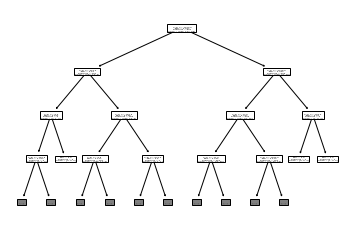

In [114]:
import graphviz
from sklearn import tree

#dot_data = tree.export_graphviz(dt, feature_names=airline_preprocessed.columns, class_names=label_encoder.classes_)
#graph = graphviz.Source(dot_data) 
display(tree.plot_tree(dt,max_depth=3))


#display(dot_data)

In [24]:
print(f'Decision Tree Fit complete. Time Elapsed: {time.time() - start_time:.2f} sec.')

Decision Tree Fit complete. Time Elapsed: 40467.40 sec.


In [118]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    airline_preprocessed, airline_target,test_size=0.2)

In [119]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(data_train, target_train)
print(f'Decision Tree Fit complete. Time Elapsed: {time.time() - start_time:.2f} sec.')

Decision Tree Fit complete. Time Elapsed: 0.08 sec.


In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
target_prediction = dt.predict(data_test)
#display(target_prediction)
#display(target_test)
confusion_matrix(target_test, target_prediction)
print(f'accuracy: {accuracy_score(target_test, target_prediction):.2f}')
print(f'f1_score: {f1_score(target_test, target_prediction, average="weighted"):.2f}')
#mean_absolute_percentage_error()
print(f'MAPE: {mape(target_test, target_prediction):,}')
print(f'MAE: {mae(target_test, target_prediction):.2f}')
print(dt.get_depth())

accuracy: 0.68
f1_score: 0.68
MAPE: 835,417,730,877,227.0
MAE: 0.40
28
